# Bland-Altman plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random
import seaborn as sns
%matplotlib inline

#### Koden i cellen under importerer alle nødvendige data og legger de i en hver sin "dataframe" eller tabell

In [2]:
# RMSSD Maxdiff
EKG_RMSSD_maxdiff_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet1")
PPG_RMSSD_maxdiff=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet2")
PPG_RMSSD_maxdiff_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet3")
# SDNN Maxdiff
EKG_SDNN_maxdiff_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet4")
PPG_SDNN_maxdiff=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet5")
PPG_SDNN_maxdiff_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet6")
# RMSSD footpoint
EKG_RMSSD_foot_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet7")
PPG_RMSSD_foot=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet8")
PPG_RMSSD_foot_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet9")
# SDNN footpoint
EKG_SDNN_foot_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet10")
PPG_SDNN_foot=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet11")
PPG_SDNN_foot_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet12")

## Fremgangsmåte
#### Variabler: 

\begin{equation*}
S = punktene\;i\;Blant{-}Altman\;plottet\\
S_1 = HRV{-}verdier\;fra\;EKG\\
S_2 = HRV{-}verdier\;fra\;PPG
\end{equation*}

I litteraturen ser jeg at punktene i Blant-Altman plottet ofte er representert med denne ligningen 

\begin{equation*}
S(x,y) = (\frac{S_1 + S_2}{2}), (S_1-S_2)
\end{equation*}

I beregningene som er gjort her har jeg kun benyttet $S_1$ som x-koordinat (dette fordi jeg tenker at vi stoler mer på EKG-verdien som "true value")

\begin{equation*}
S(x,y) = (S_1), (S_1-S_2)
\end{equation*}

Videre beregner jeg gjennomsnittet av alle differansene

\begin{equation*}
\frac{1}{n}\sum_{n=0}^{n-1}(S_{1_n}-S_{2_n}) 
\end{equation*}

og 95% "Limits of agreement" som jeg beregner ved å ta standard avviket til differansene og multiplisere det med 1.96  <cite>[(1)][1]</cite>

[1]:https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot

\begin{equation*}
Limits\;of\;agreement = \sigma * 1.96 
\end{equation*}

In [3]:
def plotblandaltman(x,y,title,sd_limit):
    plt.figure(figsize=(20,8))
    plt.suptitle(title, fontsize="20")
    if len(x.loc[0]) != len(y.loc[0]):
    # sjekk at "arrayene" er like lange - gi feilmelding dersom de er forskjellige
        raise ValueError('x does not have the same length as y')
    else:
        for i in range(len(x.loc[0])):
            a = np.asarray(x.iloc[0:,i])
            #a = np.asarray(x.iloc[0:,i])+np.asarray(y.iloc[0:,i])/2
            b = np.asarray(x.iloc[0:,i])-np.asarray(y.iloc[0:,i])
            mean_diff = np.mean(b)
            std_diff = np.std(b, axis=0)
            limit_of_agreement = sd_limit * std_diff
            lower = mean_diff - limit_of_agreement
            upper = mean_diff + limit_of_agreement
                
            difference = upper - lower
            lowerplot = lower - (difference * 0.5)
            upperplot = upper + (difference * 0.5)
            plt.subplot(2 ,3 , i+1)
            plt.axhline(y=mean_diff, linestyle = "--", color = "red", label="mean diff")
            
            plt.axhline(y=lower, linestyle = "--", color = "grey", label="-1.96 SD")
            plt.axhline(y=upper, linestyle = "--", color = "grey", label="1.96 SD")
            
            plt.text(a.max()*0.85, upper * 1.1, " 1.96 SD", color = "grey", fontsize = "14")
            plt.text(a.max()*0.85, lower * 0.9, "-1.96 SD", color = "grey", fontsize = "14")
            plt.text(a.max()*0.85, mean_diff * 0.85, "Mean", color = "red", fontsize = "14")
            plt.ylim(lowerplot, upperplot)
            plt.scatter(x=a,y=b)
            plt.title(x.columns[i], fontsize = "18")


In [4]:
g = np.array([2,4,6,3,4,-4,-3])
abs(g.min())

4

#### Her har jeg samlet alle dataene i en array slik at jeg senere kan iterere over dem med en FOR-loop

In [5]:
data=[
    [EKG_RMSSD_maxdiff_outlierkorr,PPG_RMSSD_maxdiff,PPG_RMSSD_maxdiff_outlierkorr],
    [EKG_SDNN_maxdiff_outlierkorr,PPG_SDNN_maxdiff,PPG_SDNN_maxdiff_outlierkorr],
    [EKG_RMSSD_foot_outlierkorr,PPG_RMSSD_foot,PPG_RMSSD_foot_outlierkorr],
    [EKG_SDNN_foot_outlierkorr, PPG_SDNN_foot, PPG_SDNN_foot_outlierkorr]
]

#### Titler til plot

In [6]:
Agreement between ECG and PPG in <SDNN/RMSSD> based on <maxdiff/foot point> fiducial point <with/without> outlier correction.

SyntaxError: invalid syntax (<ipython-input-6-6357ba90d42e>, line 1)

In [10]:
Titles=['Agreement between ECG and PPG in RMSSD based on maxdiff fiducial point without outlier correction',
        'Agreement between ECG and PPG in RMSSD based on maxdiff fiducial point with outlier correction',
        'Agreement between ECG and PPG in SDNN based on maxdiff fiducial point without outlier correction',
        'Agreement between ECG and PPG in SDNN based on maxdiff fiducial point with outlier correction',
        'Agreement between ECG and PPG in RMSSD based on foot point fiducial point without outlier correction',
        'Agreement between ECG and PPG in RMSSD based on foot point fiducial point with outlier correction',
        'Agreement between ECG and PPG in SDNN based on foot point fiducial point without outlier correction',
        'Agreement between ECG and PPG in SDNN based on foot point fiducial point with outlier correction']
        

In [11]:
TitlesOld=['EKG RMSSD maxdiff Outliercorr VS PPG RMSSD maxdiff', 'EKG RMSSD maxdiff outliercorr VS PPG RMSSD maxdiff outliercorr', 'EKG SDNN maxdiff outliercorr VS PPG SDNN maxdiff', 'EKG SDNN maxdiff Outliercorr VS PPG SDNN maxdiff outliercorr', 'EKG RMSSD foot outliercorr VS PPG RMSSD foot','EKG RMSSD foot outliercorr VS PPG RMSSD foot outliercorr','EKG SDNN foot outliercorr VS PPG SDNN foot','EKG SDNN foot outliercorr VS PPG SDNN foot outliercorr']

#### Lager Bland-Altman plot for alle dataene

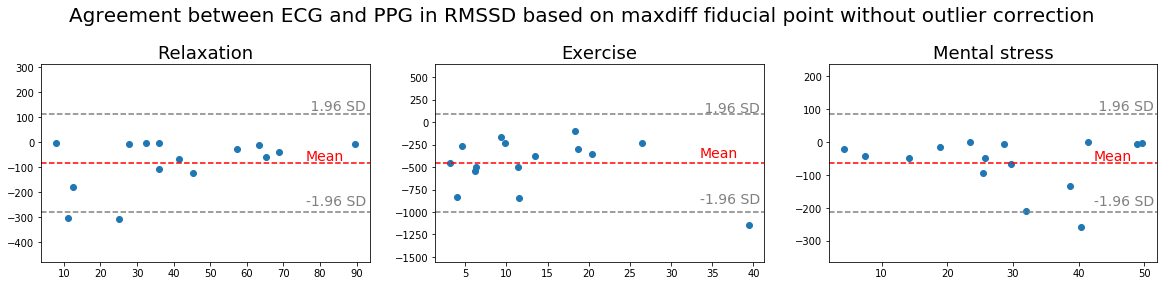

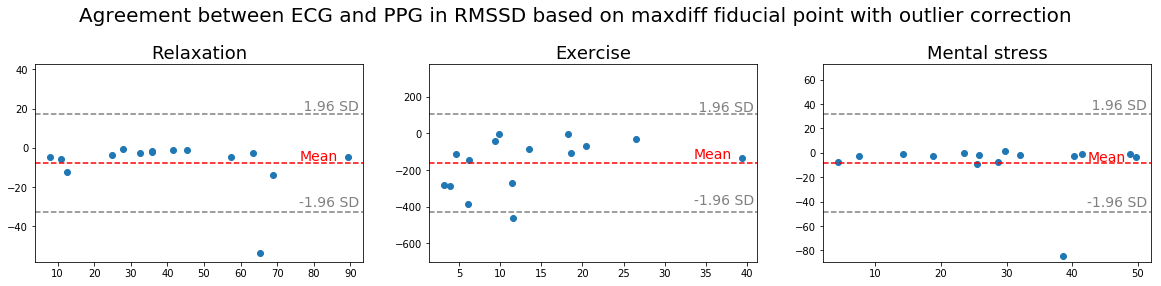

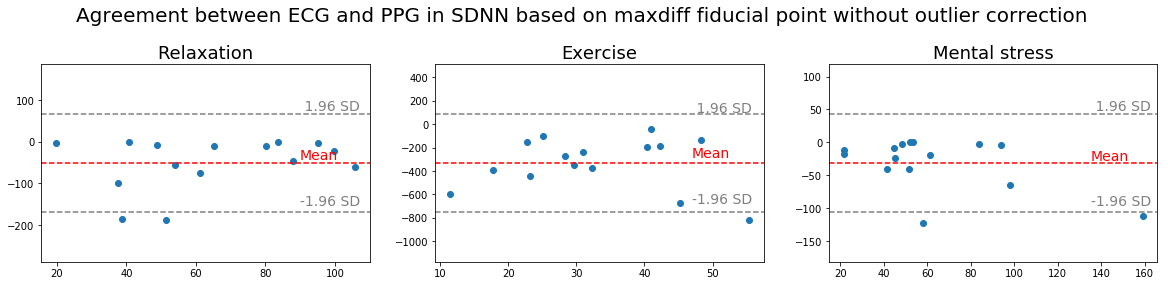

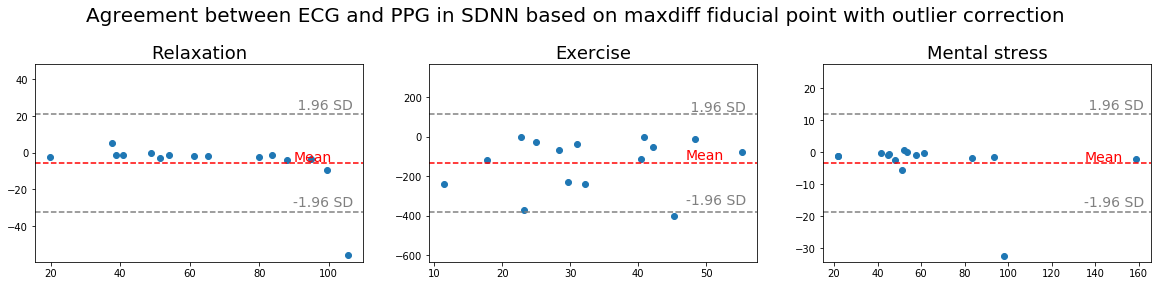

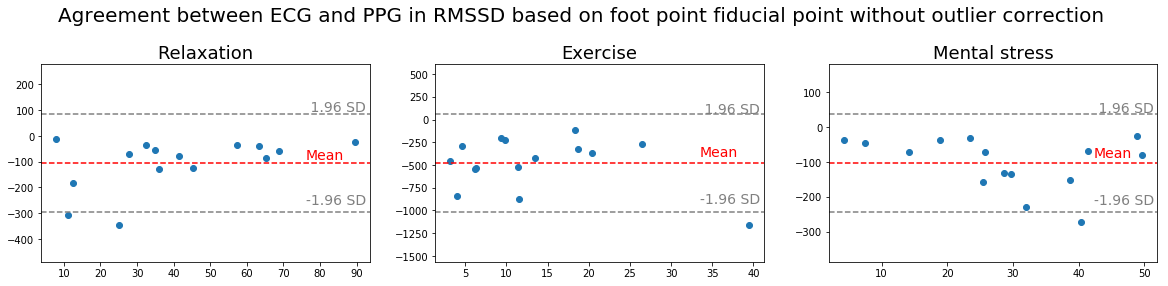

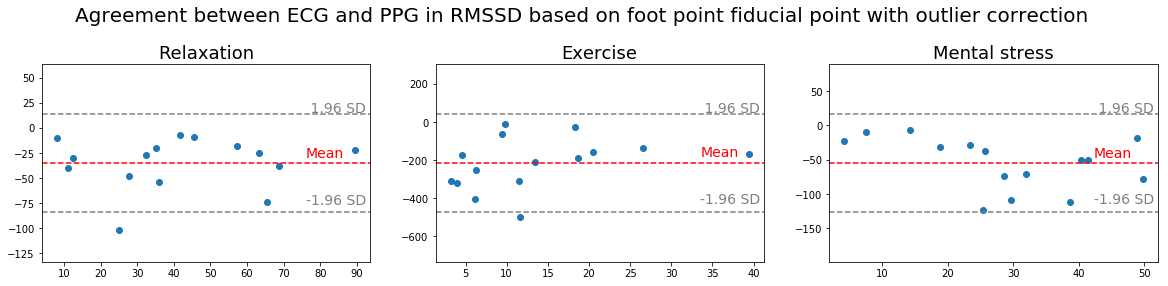

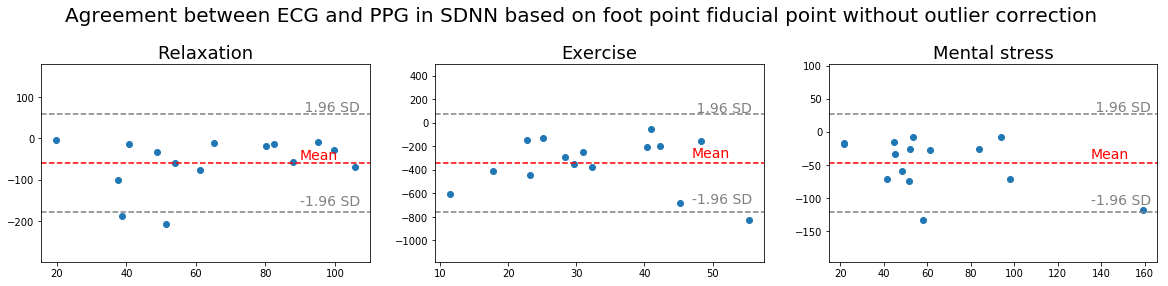

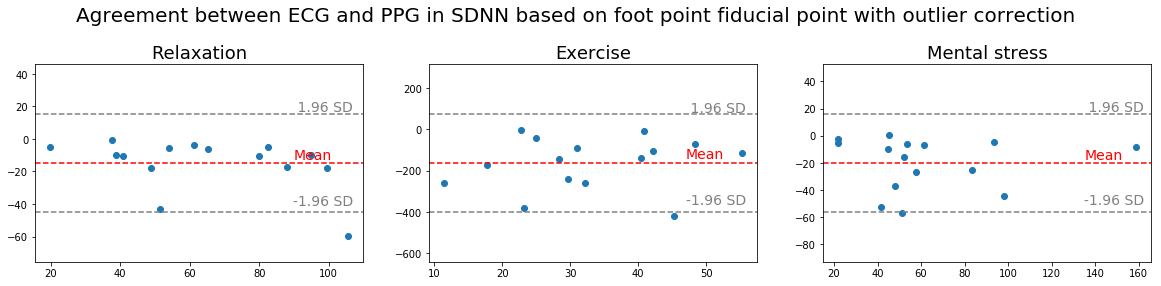

In [12]:
%matplotlib inline
k = 0
for i in range(4):
    x=data[i]
    for j in range(2):
        plotblandaltman(x[0],x[j+1],Titles[k],1.96)
        k += 1
        plt.savefig("figur {}".format(k))
plt.show()
        


[1]:http://www.quotedb.com/quotes/2112

[1] WIkipedia: https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot